In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [32]:
economy = pd.read_csv('data/economy-and-growth.csv')
US_economy = economy[(economy['Country Name']=='United States')]
US_economy.head()

,Country Name,Country Code,Year,average_value_DEC alternative conversion factor (LCU per US$),average_value_Discrepancy in expenditure estimate of GDP (current LCU),average_value_GDP (constant 2010 US$),average_value_GDP (constant LCU),average_value_GDP (current LCU),average_value_GDP (current US$),average_value_GDP deflator (base year varies by country),average_value_GDP growth (annual %),average_value_GDP per capita (constant 2010 US$),average_value_GDP per capita (constant LCU),average_value_GDP per capita (current LCU),average_value_GDP per capita (current US$),average_value_GDP per capita growth (annual %),"average_value_GDP per capita, PPP (constant 2017 international $)","average_value_GDP per capita, PPP (current international $)","average_value_GDP, PPP (constant 2017 international $)","average_value_GDP, PPP (current international $)",average_value_GDP: linked series (current LCU),average_value_GNI (constant 2010 US$),average_value_GNI (current LCU),average_value_GNI (current US$),average_value_GNI per capita (constant 2010 US$),average_value_GNI per capita (current LCU),"average_value_GNI per capita, Atlas method (current US$)","average_value_GNI per capita, PPP (constant 2017 international $)","average_value_GNI per capita, PPP (current international $)","average_value_GNI, Atlas method (current US$)","average_value_GNI, PPP (constant 2017 international $)","average_value_GNI, PPP (current international $)",average_value_GNI: linked series (current LCU),average_value_Gross domestic savings (% of GDP),average_value_Gross domestic savings (current LCU),average_value_Gross domestic savings (current US$),average_value_Gross savings (% of GDP),average_value_Gross savings (% of GNI),average_value_Gross savings (current LCU),average_value_Gross savings (current US$),average_value_Gross value added at basic prices (GVA) (constant LCU),average_value_Gross value added at basic prices (GVA) (current LCU),average_value_Gross value added at basic prices (GVA) (current US$),average_value_Net primary income (Net income from abroad) (current LCU),average_value_Net primary income (Net income from abroad) (current US$),average_value_Net secondary income (Net current transfers from abroad) (current LCU),average_value_Net secondary income (Net current transfers from abroad) (current US$),"average_value_PPP conversion factor, GDP (LCU per international $)","average_value_PPP conversion factor, private consumption (LCU per international $)",average_value_Price level ratio of PPP conversion factor (GDP) to market exchange rate,average_value_Taxes less subsidies on products (constant LCU),average_value_Taxes less subsidies on products (current LCU),average_value_Taxes less subsidies on products (current US$)
152,United States,USA,1975,1.0,0.0,5.425292e+12,5.905882e+12,1.684904e+12,1.684904e+12,28.529251,-0.205464,25120.230850,27345.465873,7801.456664,7801.456664,-1.184589,NaN,NaN,NaN,NaN,NaN,5.446960e+12,1.684554e+12,1.684554e+12,25220.560515,7799.836091,8510.0,NaN,NaN,1.837616e+12,NaN,NaN,NaN,21.225660,3.576320e+11,3.576320e+11,20.915257,20.919602,3.524020e+11,3.524020e+11,6.303043e+12,1.554104e+12,1.554104e+12,1.300400e+10,1.300400e+10,-9.142000e+09,-9.142000e+09,NaN,NaN,NaN,NaN,NaN,NaN
391,United States,USA,1992,1.0,-1000000.0,9.308206e+12,1.013276e+13,6.520327e+12,6.520327e+12,64.348981,3.522443,36287.322863,39501.776671,25418.990776,25418.990776,2.096615,40666.700579,25418.990776,1.043158e+13,6.520327e+12,6.520327e+12,9.316526e+12,6.435469e+12,6.435469e+12,36319.757579,25088.178423,25680.0,41128.182579,25090.0,6.587044e+12,1.054995e+13,6.435469e+12,6.435469e+12,19.544802,1.274385e+12,1.274385e+12,17.681522,17.914670,1.152893e+12,1.152893e+12,9.929897e+12,6.067042e+12,6.067042e+12,3.107700e+10,3.107700e+10,-4.191200e+10,-4.191200e+10,1.0,1.0,1.0,NaN,NaN,NaN
549,United States,USA,1994,1.0,-1000000.0,9.949783e+12,1.083117e+13,7.287236e+12,7.287236e+12,67.280239,4.028839,37813.758179,41163.428791,27694.853416,27694.853416,2.760928,42377.

In [33]:
# Format: (start_year, end_year, 'President', 'Party')
presidential_terms = [
    (1961, 1963, 'Kennedy', 'Democrat'),
    (1963, 1969, 'Johnson', 'Democrat'),
    (1969, 1974, 'Nixon', 'Republican'),
    (1974, 1977, 'Ford', 'Republican'),
    (1977, 1981, 'Carter', 'Democrat'),
    (1981, 1989, 'Reagan', 'Republican'),
    (1989, 1993, 'Bush Sr.', 'Republican'),
    (1993, 2001, 'Clinton', 'Democrat'),
    (2001, 2009, 'Bush Jr.', 'Republican'),
    (2009, 2017, 'Obama', 'Democrat'),
    (2017, 2021, 'Trump', 'Republican'),
]

# Format: (start_year, end_year, 'President', 'Party')
presidential_terms_split = [
    #(1961, 1963, 'Kennedy', 'Democrat'),
    (1963, 1969, 'Johnson', 'Democrat'),
    (1969, 1973, 'Nixon Term 1', 'Republican'),
    (1973, 1974, 'Nixon Term 2', 'Republican'),
    (1974, 1977, 'Ford', 'Republican'),
    (1977, 1981, 'Carter', 'Democrat'),
    (1981, 1985, 'Reagan Term 1', 'Republican'),
    (1985, 1989, 'Reagan Term 2', 'Republican'),
    (1989, 1993, 'Bush Sr.', 'Republican'),
    (1993, 1997, 'Clinton Term 1', 'Democrat'),
    (1997, 2001, 'Clinton Term 2', 'Democrat'),
    (2001, 2005, 'Bush Jr. Term 1', 'Republican'),
    (2005, 2009, 'Bush Jr. Term 2', 'Republican'),
    (2009, 2013, 'Obama Term 1', 'Democrat'),
    (2013, 2017, 'Obama Term 2', 'Democrat'),
    (2017, 2021, 'Trump', 'Republican'),
]

party_colors = {
    'Democrat': '#00AEF3',
    'Republican': '#E81B23',
}


In [34]:
term_growth = []

for start, end, president, party in presidential_terms:
    mask = (US_economy['Year'] >= start) & (US_economy['Year'] < end)  # Exclude transition year
    term_data = US_economy[mask]
    
    mean_growth = term_data['average_value_GDP growth (annual %)'].mean()
    total_growth = term_data['average_value_GDP growth (annual %)'].sum()

    term_growth.append({
        'President': president,
        'Party': party,
        'Start Year': start,
        'End Year': end - 1,
        'Mean GDP Growth (%)': round(mean_growth, 2)
    })

term_df = pd.DataFrame(term_growth)

term_growth_split = []

for start, end, president, party in presidential_terms_split:
    mask = (US_economy['Year'] >= start) & (US_economy['Year'] < end)
    term_data = US_economy[mask]

    mean_growth = term_data['average_value_GDP growth (annual %)'].mean()
    total_growth = term_data['average_value_GDP growth (annual %)'].sum()
    term_growth_split.append({
        'President': president,
        'Party': party,
        'Start Year': start,
        'End Year': end - 1,
        'Mean GDP Growth (%)': round(mean_growth, 2)
    })

term_df_split = pd.DataFrame(term_growth_split)


C:\Users\danie\AppData\Local\Temp\ipykernel_3808\2186267327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_by_party, x='Party', y='Mean GDP Growth (%)', palette=party_colors)


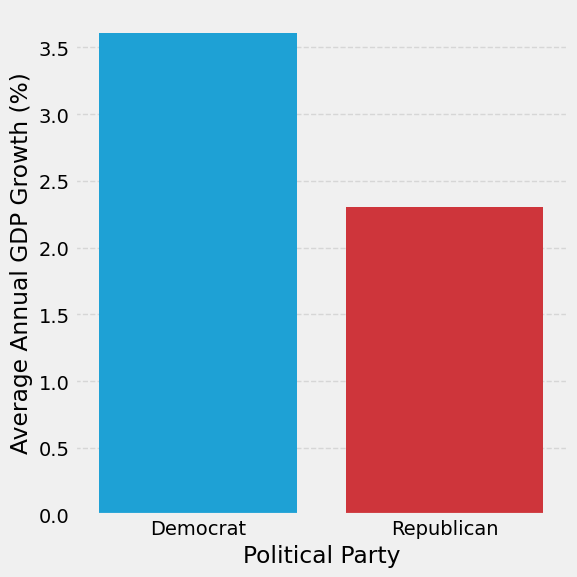

In [35]:
mean_by_party = term_df.groupby('Party')['Mean GDP Growth (%)'].mean().reset_index()
mean_by_party['Mean GDP Growth (%)'] = mean_by_party['Mean GDP Growth (%)']
plt.figure(figsize=(6, 6))
sns.barplot(data=mean_by_party, x='Party', y='Mean GDP Growth (%)', palette=party_colors)

plt.title('')
plt.ylabel('Average Annual GDP Growth (%)')
plt.xlabel('Political Party')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

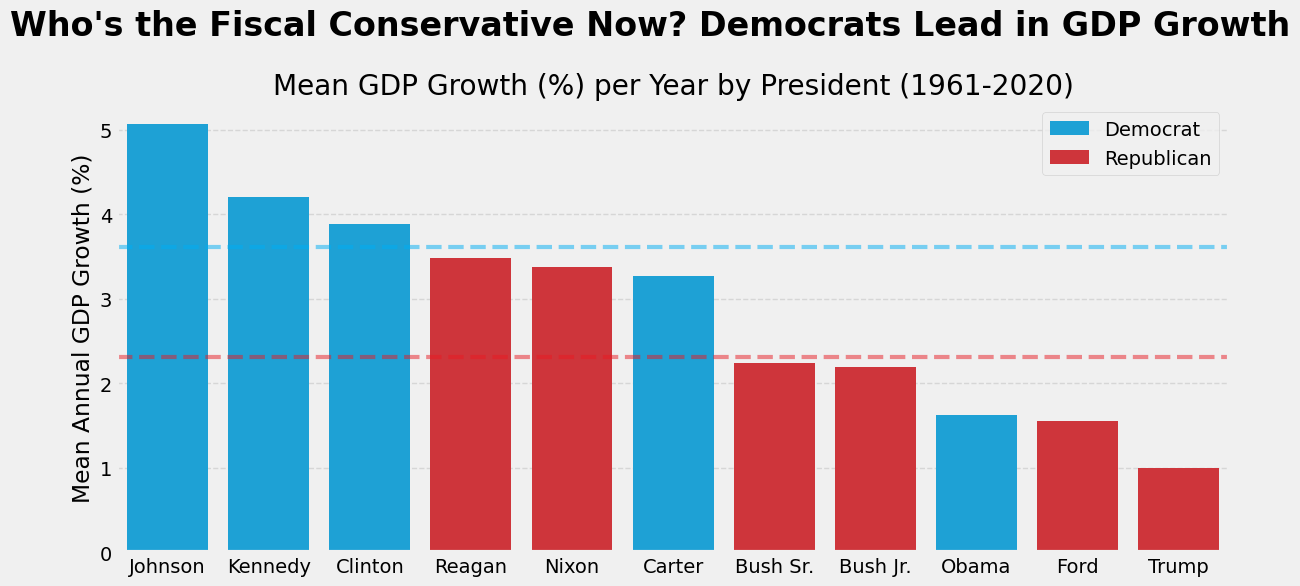

In [94]:
# Sort by GDP growth for better readability
term_df_sorted = term_df.sort_values('Mean GDP Growth (%)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=term_df_sorted, x='President', y='Mean GDP Growth (%)', hue='Party',
            palette=party_colors, dodge=False)

# Add mean lines per party
for party, color in party_colors.items():
    gr = mean_by_party[mean_by_party['Party']==party]['Mean GDP Growth (%)'].iloc[0]
    plt.axhline(gr, color=color, linestyle='--', linewidth=3,
                #label=f'{party} Mean: {gr:.2f}%',
                alpha=0.5)

plt.suptitle('Who\'s the Fiscal Conservative Now? Democrats Lead in GDP Growth', fontsize=24, fontweight='bold')

plt.title('Mean GDP Growth (%) per Year by President (1961-2020)')
plt.ylabel('Mean Annual GDP Growth (%)')
plt.xlabel('')
#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
presidential_terms = [
    #(1961, 1963, 'Kennedy', 'Democrat'),
    (1963, 1969, 'Johnson', 'Democrat'),
    (1969, 1974, 'Nixon', 'Republican'),
    (1974, 1977, 'Ford', 'Republican'),
    (1977, 1981, 'Carter', 'Democrat'),
    (1981, 1989, 'Reagan', 'Republican'),
    (1989, 1993, 'Bush Sr.', 'Republican'),
    (1993, 2001, 'Clinton', 'Democrat'),
    (2001, 2009, 'Bush Jr.', 'Republican'),
    (2009, 2017, 'Obama', 'Democrat'),
    #(2017, 2021, 'Trump', 'Republican'),
]

In [90]:
growth_change_data = []

for start, end, president, party in presidential_terms:
    start_growth = US_economy[US_economy['Year'] == start]['average_value_GDP growth (annual %)'].values
    end_growth = US_economy[US_economy['Year'] == (end - 1)]['average_value_GDP growth (annual %)'].values
    
    if len(start_growth) > 0 and len(end_growth) > 0:
        change = end_growth[0] - start_growth[0]
        growth_change_data.append({
            'President': president,
            'Party': party,
            'Start Year': start,
            'End Year': end - 1,
            'Change in GDP Growth (%)': round(change, 2)
        })

growth_change_df = pd.DataFrame(growth_change_data)

C:\Users\danie\AppData\Local\Temp\ipykernel_3808\3410760237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_change_by_party, x='Party', y='Change in GDP Growth (%)', palette=party_colors)


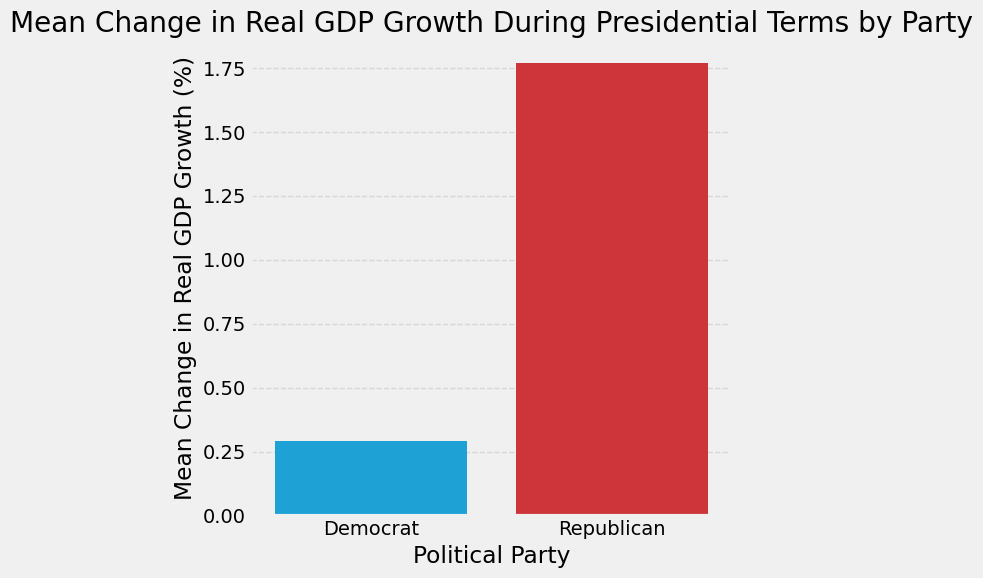

In [91]:
mean_change_by_party = growth_change_df.groupby('Party')['Change in GDP Growth (%)'].mean().reset_index()
mean_change_by_party['Change in GDP Growth (%)'] = mean_change_by_party['Change in GDP Growth (%)'].round(2)
plt.figure(figsize=(6, 6))
sns.barplot(data=mean_change_by_party, x='Party', y='Change in GDP Growth (%)', palette=party_colors)

plt.title('Mean Change in Real GDP Growth During Presidential Terms by Party')
plt.ylabel('Mean Change in Real GDP Growth (%)')
plt.xlabel('Political Party')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

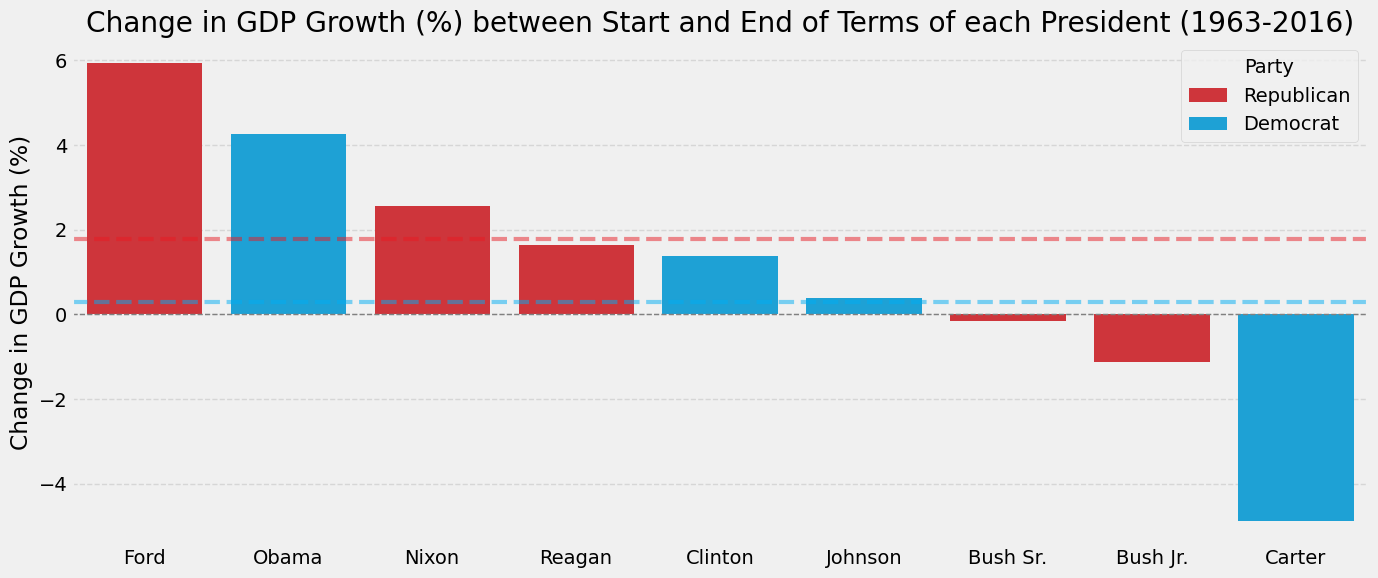

In [98]:
# Sort by change
growth_change_df_sorted = growth_change_df.sort_values('Change in GDP Growth (%)', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=growth_change_df_sorted, x='President', y='Change in GDP Growth (%)', hue='Party',
            palette=party_colors, dodge=False)

for party, color in party_colors.items():
    gr = mean_change_by_party[mean_change_by_party['Party']==party]['Change in GDP Growth (%)'].iloc[0]
    plt.axhline(gr, color=color, linestyle='--', linewidth=3,
                #label=f'{party} Mean: {gr:.2f}%',
                alpha=0.5)

plt.title('Change in GDP Growth (%) between Start and End of Terms of each President (1963-2016)')
plt.xlabel('')
plt.ylabel('Change in GDP Growth (%)')
#plt.xticks(rotation=45, ha='right')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
